In [22]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

import seaborn as sns

In [23]:
hospitales = pd.read_csv ('hospitales.csv')

In [24]:
nacimientos = pd.read_csv ('nacimientos.csv')

In [25]:
hospitales

,id_hospital,direccion,promedio_nacimientos_mensual
0,152,Paraguay 1238,2
1,93,Charcas 123,3
2,76,Corrientes 1200,4
3,101,Belgrano 122,5


In [26]:
nacimientos

,dia_nacimiento,mes_nacimiento,anio_nacimiento,peso_al_nacer,longitud_al_nacer,id_hospital,tipo_parto
0,23,10,2018,234.0,36,152,1
1,1,10,2016,421.0,36,93,2
2,4,10,2016,224.0,25,93,1
3,5,10,2016,234.0,25,152,2
4,14,10,2016,234.0,25,93,1
5,5,10,2016,234.6,15,76,2
6,6,10,2017,341.4,15,152,1
7,1,10,2017,324.7,15,152,2
8,23,10,2018,424.1,24,76,1
9,4,10,2017,233.4,24,101,2


In [27]:
#nacimientos_por_hospital = nacimientos.groupby('id_hospital').agg({'id_hospital':'count'})
#nacimientos_por_hospital.columns = [['cantidad_total']]
#nacimientos_por_hospital

In [28]:
#agrupo por hospital, mes y anio
nacimientos_por_hospital = nacimientos.groupby(['id_hospital','mes_nacimiento','anio_nacimiento'])\
                                    .agg({'mes_nacimiento':'count'})
nacimientos_por_hospital

mes_nacimiento
id_hospital mes_nacimiento anio_nacimiento                
76          1              2016                          1
            3              2017                          1
            4              2017                          1
            10             2016                          1
                           2018                          1
93          3              2018                          1
            4              2020                          1
            5              2017                          1
            10             2016                          3
                           2017                          2
101         1              2017                          1
            2              2017                          1
            10             2017                          1
152         2              2019                          1
            10             2016                          1
                           2017                          4
                           2018                          1

In [29]:
#renombro columna
nacimientos_por_hospital.columns = ['cantidad']
nacimientos_por_hospital

cantidad
id_hospital mes_nacimiento anio_nacimiento          
76          1              2016                    1
            3              2017                    1
            4              2017                    1
            10             2016                    1
                           2018                    1
93          3              2018                    1
            4              2020                    1
            5              2017                    1
            10             2016                    3
                           2017                    2
101         1              2017                    1
            2              2017                    1
            10             2017                    1
152         2              2019                    1
            10             2016                    1
                           2017                    4
                           2018                    1

In [30]:
#reordeno index
nacimientos_por_hospital_unstacked = nacimientos_por_hospital.unstack()
nacimientos_por_hospital_unstacked

cantidad                    
anio_nacimiento                2016 2017 2018 2019 2020
id_hospital mes_nacimiento                             
76          1                   1.0  NaN  NaN  NaN  NaN
            3                   NaN  1.0  NaN  NaN  NaN
            4                   NaN  1.0  NaN  NaN  NaN
            10                  1.0  NaN  1.0  NaN  NaN
93          3                   NaN  NaN  1.0  NaN  NaN
            4                   NaN  NaN  NaN  NaN  1.0
            5                   NaN  1.0  NaN  NaN  NaN
            10                  3.0  2.0  NaN  NaN  NaN
101         1                   NaN  1.0  NaN  NaN  NaN
            2                   NaN  1.0  NaN  NaN  NaN
            10                  NaN  1.0  NaN  NaN  NaN
152         2                   NaN  NaN  NaN  1.0  NaN
            10                  1.0  4.0  1.0  NaN  NaN

In [31]:
#renombro columnas
nacimientos_por_hospital_unstacked.columns =  [['2016','2017','2018','2019','2020']]
nacimientos_por_hospital_unstacked

2016 2017 2018 2019 2020
id_hospital mes_nacimiento                         
76          1               1.0  NaN  NaN  NaN  NaN
            3               NaN  1.0  NaN  NaN  NaN
            4               NaN  1.0  NaN  NaN  NaN
            10              1.0  NaN  1.0  NaN  NaN
93          3               NaN  NaN  1.0  NaN  NaN
            4               NaN  NaN  NaN  NaN  1.0
            5               NaN  1.0  NaN  NaN  NaN
            10              3.0  2.0  NaN  NaN  NaN
101         1               NaN  1.0  NaN  NaN  NaN
            2               NaN  1.0  NaN  NaN  NaN
            10              NaN  1.0  NaN  NaN  NaN
152         2               NaN  NaN  NaN  1.0  NaN
            10              1.0  4.0  1.0  NaN  NaN

In [32]:
#datos de nacimientos de todos los hospitales 2018
nacimientos_por_hospital_2018 = nacimientos_por_hospital_mensual_unstacked [['2018']]
nacimientos_por_hospital_2018

2018
id_hospital mes_nacimiento     
76          1               NaN
            3               NaN
            4               NaN
            10              1.0
93          3               1.0
            4               NaN
            5               NaN
            10              NaN
101         1               NaN
            2               NaN
            10              NaN
152         2               NaN
            10              1.0

In [33]:
nacimientos_por_hospital_2018_unstacked = nacimientos_por_hospital_2018.unstack()
nacimientos_por_hospital_2018_unstacked

2018                      
mes_nacimiento   1   2    3   4   5    10
id_hospital                              
76              NaN NaN  NaN NaN NaN  1.0
93              NaN NaN  1.0 NaN NaN  NaN
101             NaN NaN  NaN NaN NaN  NaN
152             NaN NaN  NaN NaN NaN  1.0

In [34]:
#rebautizamos los nombres de las columnas
nacimientos_por_hospital_2018_unstacked.columns = [['enero','febrero','marzo','abril','mayo','octubre']]
nacimientos_por_hospital_2018_unstacked

,enero,febrero,marzo,abril,mayo,octubre
id_hospital,,,,,,
76,NaN,NaN,NaN,NaN,NaN,1.0
93,NaN,NaN,1.0,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,1.0


In [36]:
nacimientos_octubre_2018 = nacimientos_por_hospital_2018_unstacked [['octubre']]
nacimientos_octubre_2018.columns = ['octubre_2018']
nacimientos_octubre_2018

,octubre_2018
id_hospital,
76,1.0
93,NaN
101,NaN
152,1.0


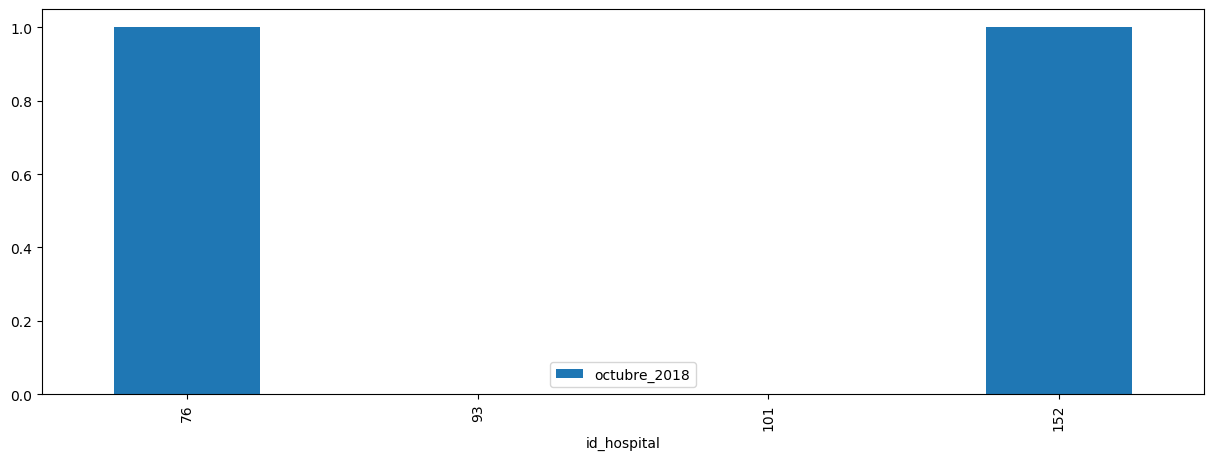

In [37]:
nacimientos_octubre_2018.plot(kind = 'bar')

In [38]:
#para lo que quiero ahcer despues, merge por columna con totro dataframe, primero reseteo indices
#reseteo indices
nacimientos_octubre_2018_reset = nacimientos_octubre_2018.reset_index()
nacimientos_octubre_2018_reset

,id_hospital,octubre_2018
0,76,1.0
1,93,NaN
2,101,NaN
3,152,1.0


In [39]:
#hago merge por id_hospital con el dataframe 'hospitales'
comparativa_octubre_2018_vs_promedio = pd.merge(nacimientos_octubre_2018_reset,hospitales,on='id_hospital')
comparativa_octubre_2018_vs_promedio


,id_hospital,octubre_2018,direccion,promedio_nacimientos_mensual
0,76,1.0,Corrientes 1200,4
1,93,NaN,Charcas 123,3
2,101,NaN,Belgrano 122,5
3,152,1.0,Paraguay 1238,2


In [41]:
comparativa_octubre_2018_vs_promedio ['supera_promedio'] = \
               (comparativa_octubre_2018_vs_promedio['octubre_2018']>\
                comparativa_octubre_2018_vs_promedio['promedio_nacimientos_mensual'])
comparativa_octubre_2018_vs_promedio

,id_hospital,octubre_2018,direccion,promedio_nacimientos_mensual,supera_promedio
0,76,1.0,Corrientes 1200,4,False
1,93,NaN,Charcas 123,3,False
2,101,NaN,Belgrano 122,5,False
3,152,1.0,Paraguay 1238,2,False


In [43]:
#ahora quiero comparar los datos de octubre 2018 con los de octubre 2017
#voy a hacer el mismo proceso que hice para obtener el dataframe de octubre 2018

#datos de nacimientos de todos los hospitales 2017
nacimientos_por_hospital_2017 = nacimientos_por_hospital_mensual_unstacked [['2017']]
nacimientos_por_hospital_2017

2017
id_hospital mes_nacimiento     
76          1               NaN
            3               1.0
            4               1.0
            10              NaN
93          3               NaN
            4               NaN
            5               1.0
            10              2.0
101         1               1.0
            2               1.0
            10              1.0
152         2               NaN
            10              4.0

In [44]:
nacimientos_por_hospital_2017_unstacked = nacimientos_por_hospital_2017.unstack()
nacimientos_por_hospital_2017_unstacked

2017                         
mes_nacimiento   1    2    3    4    5    10
id_hospital                                 
76              NaN  NaN  1.0  1.0  NaN  NaN
93              NaN  NaN  NaN  NaN  1.0  2.0
101             1.0  1.0  NaN  NaN  NaN  1.0
152             NaN  NaN  NaN  NaN  NaN  4.0

In [45]:
#rebautizamos los nombres de las columnas
nacimientos_por_hospital_2017_unstacked.columns = [['enero','febrero','marzo','abril','mayo','octubre']]
nacimientos_por_hospital_2017_unstacked

,enero,febrero,marzo,abril,mayo,octubre
id_hospital,,,,,,
76,NaN,NaN,1.0,1.0,NaN,NaN
93,NaN,NaN,NaN,NaN,1.0,2.0
101,1.0,1.0,NaN,NaN,NaN,1.0
152,NaN,NaN,NaN,NaN,NaN,4.0


In [46]:
nacimientos_octubre_2017 = nacimientos_por_hospital_2017_unstacked [['octubre']]
nacimientos_octubre_2017.columns = ['octubre_2017']
nacimientos_octubre_2017

,octubre_2017
id_hospital,
76,NaN
93,2.0
101,1.0
152,4.0


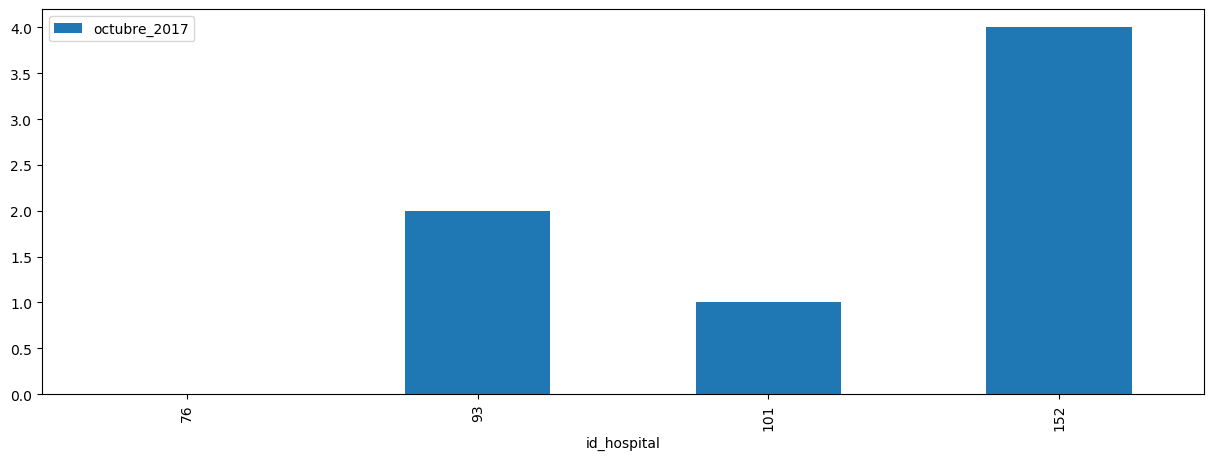

In [47]:
nacimientos_octubre_2017.plot(kind = 'bar')

In [48]:
#para lo que quiero hacer despues, merge por columna con el dataframe octubre 2018, primero reseteo indices
#reseteo indices
nacimientos_octubre_2017_reset = nacimientos_octubre_2017.reset_index()
nacimientos_octubre_2017_reset

,id_hospital,octubre_2017
0,76,NaN
1,93,2.0
2,101,1.0
3,152,4.0


In [49]:
#hago merge por id_hospital con el dataframe 'octubre 2018'
comparativa_octubre_2018_vs_octubre_2019 = pd.merge(nacimientos_octubre_2018_reset,nacimientos_octubre_2017_reset,on='id_hospital')
comparativa_octubre_2018_vs_octubre_2019

,id_hospital,octubre_2018,octubre_2017
0,76,1.0,NaN
1,93,NaN,2.0
2,101,NaN,1.0
3,152,1.0,4.0


In [50]:
#para obtener la cantidad de partos normales y cesarea, armo nuevos dataframes siguiendo la logica anterior
#agrupo por tipo_parto, mes y anio
nacimientos_por_tipo = nacimientos.groupby(['tipo_parto','mes_nacimiento','anio_nacimiento'])\
                                    .agg({'mes_nacimiento':'count'})
nacimientos_por_tipo

mes_nacimiento
tipo_parto mes_nacimiento anio_nacimiento                
1          1              2017                          1
           2              2019                          1
           3              2017                          1
           4              2020                          1
           5              2017                          1
           10             2016                          2
                          2017                          3
                          2018                          2
2          1              2016                          1
           2              2017                          1
           3              2018                          1
           4              2017                          1
           10             2016                          3
                          2017                          4

In [51]:
#reordeno index
nacimientos_por_tipo_unstacked = nacimientos_por_tipo.unstack()
nacimientos_por_tipo_unstacked

mes_nacimiento                    
anio_nacimiento                     2016 2017 2018 2019 2020
tipo_parto mes_nacimiento                                   
1          1                         NaN  1.0  NaN  NaN  NaN
           2                         NaN  NaN  NaN  1.0  NaN
           3                         NaN  1.0  NaN  NaN  NaN
           4                         NaN  NaN  NaN  NaN  1.0
           5                         NaN  1.0  NaN  NaN  NaN
           10                        2.0  3.0  2.0  NaN  NaN
2          1                         1.0  NaN  NaN  NaN  NaN
           2                         NaN  1.0  NaN  NaN  NaN
           3                         NaN  NaN  1.0  NaN  NaN
           4                         NaN  1.0  NaN  NaN  NaN
           10                        3.0  4.0  NaN  NaN  NaN

In [52]:
#renombro columnas
nacimientos_por_tipo_unstacked.columns =  [['2016','2017','2018','2019','2020']]
nacimientos_por_tipo_unstacked

2016 2017 2018 2019 2020
tipo_parto mes_nacimiento                         
1          1               NaN  1.0  NaN  NaN  NaN
           2               NaN  NaN  NaN  1.0  NaN
           3               NaN  1.0  NaN  NaN  NaN
           4               NaN  NaN  NaN  NaN  1.0
           5               NaN  1.0  NaN  NaN  NaN
           10              2.0  3.0  2.0  NaN  NaN
2          1               1.0  NaN  NaN  NaN  NaN
           2               NaN  1.0  NaN  NaN  NaN
           3               NaN  NaN  1.0  NaN  NaN
           4               NaN  1.0  NaN  NaN  NaN
           10              3.0  4.0  NaN  NaN  NaN

In [53]:
#datos de nacimientos de todos los tipos 2018
nacimientos_por_tipo_2018 = nacimientos_por_tipo_unstacked [['2018']]
nacimientos_por_tipo_2018

2018
tipo_parto mes_nacimiento     
1          1               NaN
           2               NaN
           3               NaN
           4               NaN
           5               NaN
           10              2.0
2          1               NaN
           2               NaN
           3               1.0
           4               NaN
           10              NaN

In [54]:
#datos de nacimientos de todos los tipos 2017
nacimientos_por_tipo_2017 = nacimientos_por_tipo_unstacked [['2017']]
nacimientos_por_tipo_2017

2017
tipo_parto mes_nacimiento     
1          1               1.0
           2               NaN
           3               1.0
           4               NaN
           5               1.0
           10              3.0
2          1               NaN
           2               1.0
           3               NaN
           4               1.0
           10              4.0

In [56]:
#reorganizamos el dataframe
nacimientos_por_tipo_2018_unstacked = nacimientos_por_tipo_2018.unstack()
nacimientos_por_tipo_2018_unstacked

2018                      
mes_nacimiento   1   2    3   4   5    10
tipo_parto                               
1               NaN NaN  NaN NaN NaN  2.0
2               NaN NaN  1.0 NaN NaN  NaN

In [57]:
#reorganizamos el otro datafram
nacimientos_por_tipo_2017_unstacked = nacimientos_por_tipo_2017.unstack()
nacimientos_por_tipo_2017_unstacked

2017                         
mes_nacimiento   1    2    3    4    5    10
tipo_parto                                  
1               1.0  NaN  1.0  NaN  1.0  3.0
2               NaN  1.0  NaN  1.0  NaN  4.0

In [58]:
#rebautizamos los nombres de las columnas
nacimientos_por_tipo_2018_unstacked.columns = [['enero','febrero','marzo','abril','mayo','octubre']]
nacimientos_por_tipo_2018_unstacked

,enero,febrero,marzo,abril,mayo,octubre
tipo_parto,,,,,,
1,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,NaN,1.0,NaN,NaN,NaN


In [59]:
#rebautizamos los nombres de las columnas del otro dataframe
nacimientos_por_tipo_2017_unstacked.columns = [['enero','febrero','marzo','abril','mayo','octubre']]
nacimientos_por_tipo_2017_unstacked

,enero,febrero,marzo,abril,mayo,octubre
tipo_parto,,,,,,
1,1.0,NaN,1.0,NaN,1.0,3.0
2,NaN,1.0,NaN,1.0,NaN,4.0


In [60]:
#nos quedamos con los datos de octubre de 2018
nacimientos_pot_tipo_octubre_2018 = nacimientos_por_tipo_2018_unstacked [['octubre']]
nacimientos_pot_tipo_octubre_2018.columns = ['octubre_2018']
nacimientos_pot_tipo_octubre_2018

,octubre_2018
tipo_parto,
1,2.0
2,NaN


In [61]:
#nos quedamos con los datos de octubre de 2017
nacimientos_pot_tipo_octubre_2017 = nacimientos_por_tipo_2017_unstacked [['octubre']]
nacimientos_pot_tipo_octubre_2017.columns = ['octubre_2017']
nacimientos_pot_tipo_octubre_2017

,octubre_2017
tipo_parto,
1,3.0
2,4.0


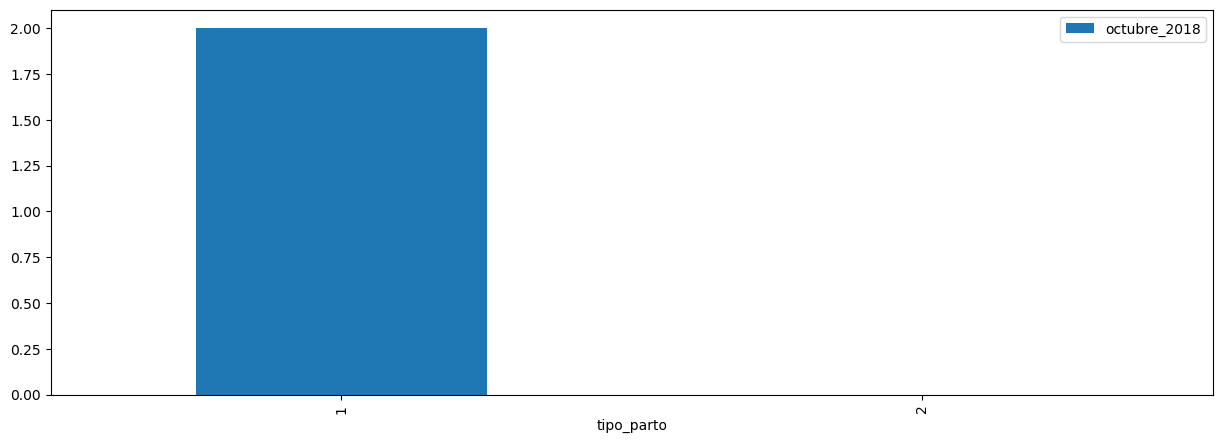

In [62]:
nacimientos_pot_tipo_octubre_2018.plot(kind='bar')

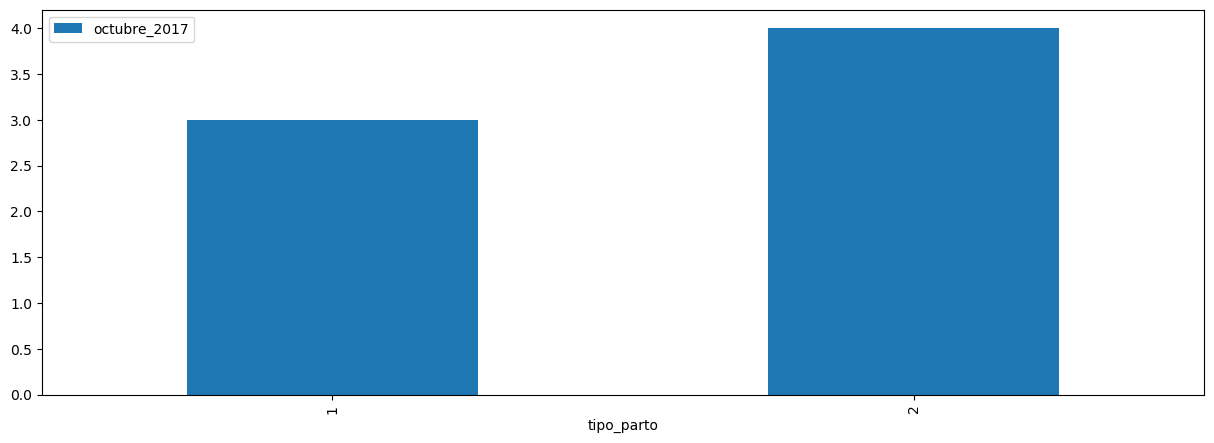

In [63]:
nacimientos_pot_tipo_octubre_2017.plot(kind='bar')

In [64]:
#para lo que quiero hacer despues, merge entre dataframe nacimientos_pot_tipo_octubre_2017 y nacimientos_pot_tipo_octubre_2018
#primero reseteo indices
#reseteo indices del dataframe nacimientos_pot_tipo_octubre_2018
nacimientos_por_tipo_octubre_2018_reset = nacimientos_pot_tipo_octubre_2018.reset_index()
nacimientos_por_tipo_octubre_2018_reset

,tipo_parto,octubre_2018
0,1,2.0
1,2,NaN


In [65]:
#reseteo indices del dataframe nacimientos_pot_tipo_octubre_2017
nacimientos_por_tipo_octubre_2017_reset = nacimientos_pot_tipo_octubre_2017.reset_index()
nacimientos_por_tipo_octubre_2017_reset

,tipo_parto,octubre_2017
0,1,3.0
1,2,4.0


In [92]:
#hago merge por tipo_parto entre dataframe nacimientos_pot_tipo_octubre_2017 y nacimientos_pot_tipo_octubre_2018
comparativa_tipos_octubre_2018_vs_octubre_2017 = pd.merge(nacimientos_por_tipo_octubre_2017_reset\
                                                           ,nacimientos_por_tipo_octubre_2018_reset\
                                                           ,on='tipo_parto')
#ajusto algunos valores del dataframe para darle mas sentido
comparativa_tipos_octubre_2018_vs_octubre_2017.loc[0, 'tipo_parto'] = 'normal'
comparativa_tipos_octubre_2018_vs_octubre_2017.loc[1, 'tipo_parto'] = 'cesarea'
comparativa_tipos_octubre_2018_vs_octubre_2017.loc[1, 'octubre_2018'] = 0

comparativa_tipos_octubre_2018_vs_octubre_2017

,tipo_parto,octubre_2017,octubre_2018
0,normal,3.0,2.0
1,cesarea,4.0,0.0


In [93]:
comparativa_tipos_octubre_2018_vs_octubre_2017_indexado = \
                         comparativa_tipos_octubre_2018_vs_octubre_2017.set_index('tipo_parto')
comparativa_tipos_octubre_2018_vs_octubre_2017_indexado

,octubre_2017,octubre_2018
tipo_parto,,
normal,3.0,2.0
cesarea,4.0,0.0


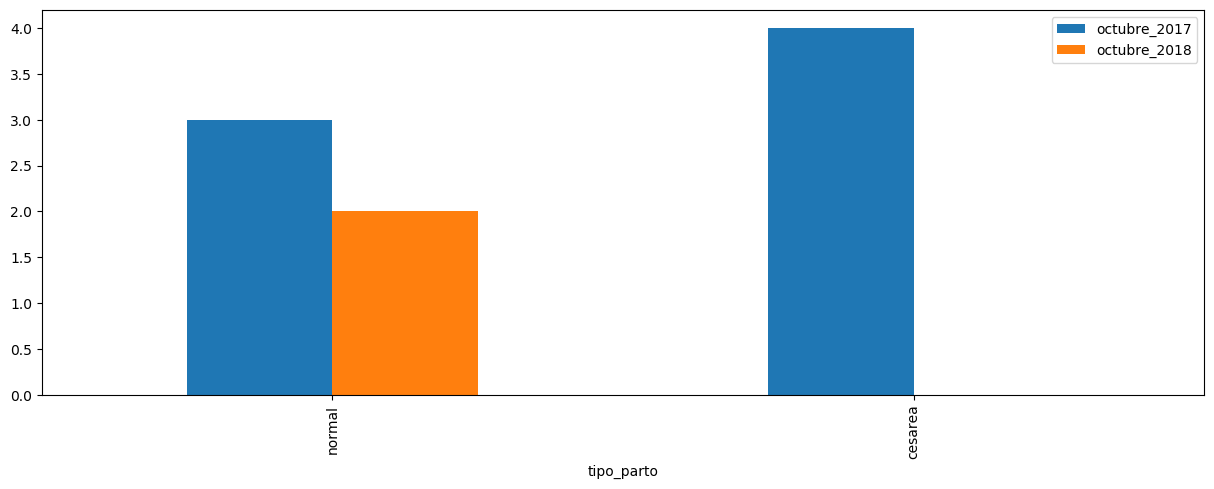

In [94]:
comparativa_tipos_octubre_2018_vs_octubre_2017_indexado.plot(kind='bar')

In [96]:
#calculamos la variacion porcentual de nacimientos para el mes de octubre entre 2017 y 2018
comparativa_tipos_octubre_2018_vs_octubre_2017_indexado['variacion_porcentual'] = \
                            comparativa_tipos_octubre_2018_vs_octubre_2017_indexado[['octubre_2017','octubre_2018']]\
                           .apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1)
comparativa_tipos_octubre_2018_vs_octubre_2017_indexado

,octubre_2017,octubre_2018,variacion_porcentual
tipo_parto,,,
normal,3.0,2.0,33.333333
cesarea,4.0,0.0,100.000000


In [ ]:
FINAL